# Clustering

In [41]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [42]:
data = pd.read_csv('./insurance.csv')

a) Clustering

c:\Users\maria\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Centroids of the 3 clusters:
          age        bmi  children       charges
0  27.383534  28.825402  0.459839   6220.189966
1  50.858333  32.717833  0.545833  21060.608386
2  40.027778  30.466708  2.705556  12636.328784

Cluster sizes:
 cluster
0    498
1    480
2    360
Name: count, dtype: int64

Smoker counts per cluster:
 cluster  smoker
0        no        443
         yes        55
1        no        323
         yes       157
2        no        298
         yes        62
Name: count, dtype: int64


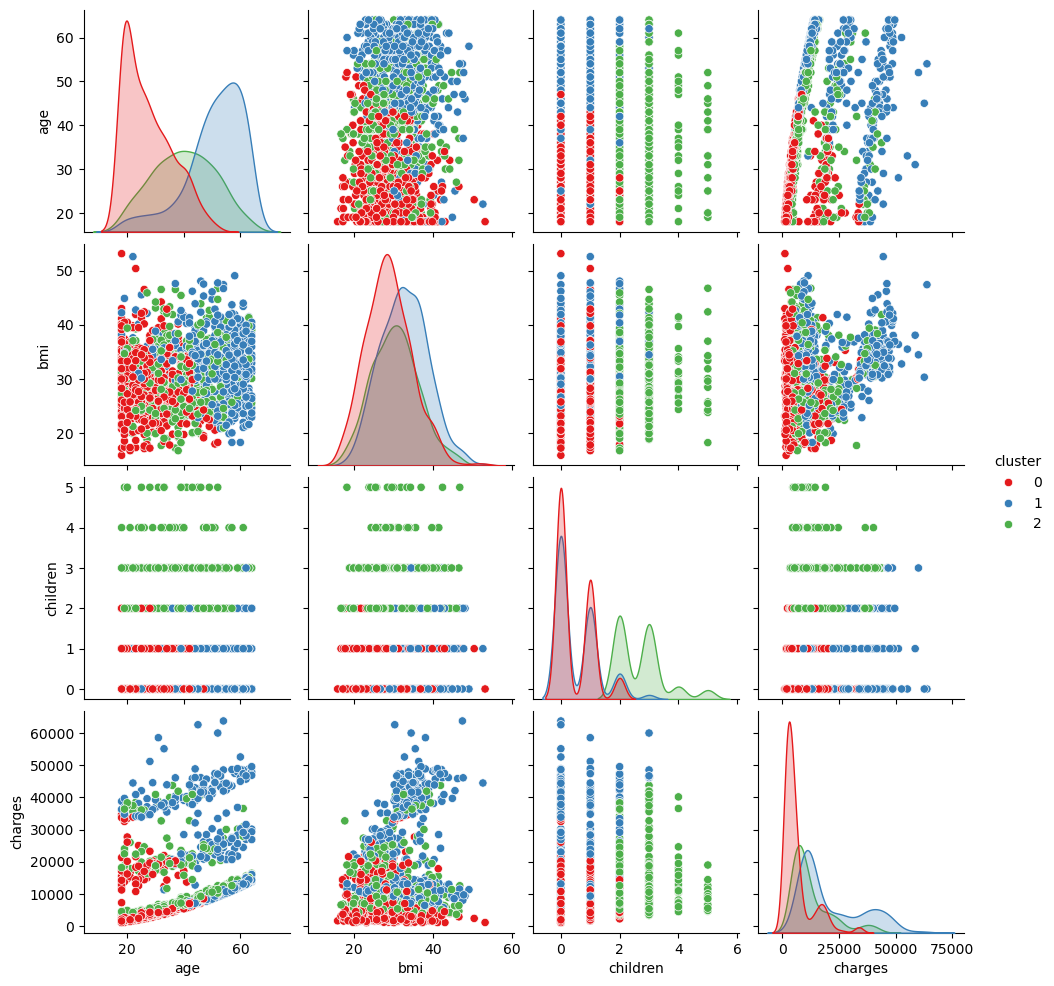

In [ ]:
# Select features for clustering
features = ['age', 'bmi', 'children', 'charges']
X = data[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to original dataframe
data['cluster'] = kmeans.labels_

# Cluster centroids (in original scale for interpretation)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)
centroids_df = pd.DataFrame(centroids, columns=features)
print("Centroids of the 3 clusters:\n", centroids_df)

# Cluster sizes
cluster_sizes = data['cluster'].value_counts().sort_index()
print("\nCluster sizes:\n", cluster_sizes)

# Number of smokers/non-smokers per cluster
smoker_counts = data.groupby('cluster')['smoker'].value_counts()
print("\nSmoker counts per cluster:\n", smoker_counts)

# Pairplot visualization
sns.pairplot(data, vars=features, hue='cluster', palette='Set1')